# The Objective
In attempts to build ML models using the heart-disease dataset, the following questions needs clarification in this stage (data exploration).
1. What problem needs to be solved?
2. Does the dataset have duplicate rows (records)?
3. What data-types the dataset contains?
4. Does the dataset have empty columns (features)?
5. Is the dataset sufficient for building the model(s)?
6. Which feature appears more important than the other?

Once, these questions are clarified, a list of action items can help for next stage.

Let's load the necessary libraries and data for investigation.

In [2]:
# All required libraries.
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;
from custom_libs import helper
from importlib import reload
import numpy as np

In [5]:
header =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('data/uci-heart-disease/processed.cleveland.data', names=header)
# 303 records and 14 columns.
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 1. What problem needs to be solved?
<b>Classify</b> - whether a patient has heart disease based on his/her medical data.

At a glance, it appears to be binary classification problem.\
From the data-dictionary, `num` appears as the target variable. Let's investigate the target variable's supportability for <u>binary classification</u> problem.

In [6]:
# Target variable (num) has integer data-type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
# Target variable (num) has more than two values/classes. Meanwhile, binary classification requires only 2 values/classes.
data['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

### Observation:
The target variable (num) cannot support binary classification since it has more than 2 values/classes. \
If we understood the original intention from the data-dictionary and the literature:
- Any patient with less than 50% vessel narrowing was marked as `value: 0` -- no heart disease
- Any patient with more than 50% vessel narrowing was marked as `value: 1` -- has heart disease. This was further expanded to 1, 2, 3 and 4 based on affected major vessel.

### Conclusion:
We <u>can safely convert this to a binary classification problem</u> by replacing any values of target variable (num) other than `0` to `1`. This logically simplifies that any patient with vessel narrowing more than 50% is suspected to have heart-disease (without distorting the original meaning much).

### Action(s)
1. Convert any values in target variable (num) other than `0` to `1` - to support binary classification problem.
2. Also, rename the target variable from `num` to `target` to give a more meaningful name.

In [8]:
# 1. Convert any values in target variable (num) other than `0` to `1` - to support binary classification problem.
# Let's see the count before conversion
data['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [9]:
# Let's see if the sum of 1, 2, 3 and 4 has total up to 55 + 36 + 35 + 13 = 139.
data.loc[data['num']!=0,"num"]=1
data['num'].value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [10]:
# 2. Also, rename the target variable from `num` to `target` to give a more meaningful name.
data.rename(columns={'num':'target'}, inplace=True)

In [11]:
# The new 'target' column tallies with the old 'num' column.
data['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

## 2. Does the dataset have duplicate rows (records)?
So, we converted the target variable from multi-class to binary to support binary classification problem. \
Now, let's investigate if any duplicate records (rows) present in the dataset.

In [12]:
# All columns were checked, and no duplicate record found.
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


## 3. What data-types the dataset contains?
We got the basic idea about the data types from the 'data-dictionary'. let's investigate and verify further the content.

In [ ]:
data.info()

All features appears to be in numerical format except for `ca` and `thal`. They appear to be categorical from 'data-dictionary'. Let's investigate further.

In [ ]:
# For column 'ca', 4 records contains the value of '?'.
data['ca'].value_counts()

In [ ]:
# For column 'thal', 2 records contains the value of '?'.
data['thal'].value_counts()

In [13]:
# Let's investigate if the total 6 (4 from 'ca' and 2 from 'thal') records are disjoint, using OR operator first.
# Only when OR operator doesn't satisfy, we will use AND operator to further investigate if records are distributed between two features.
# Looks like the sum is 6, and they are disjoint (using OR operator).
data[(data['thal']=='?') | (data['ca']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [14]:
# There is only < 2% uninterpretable data found in 'ca' and 'thal' with '?' character.
print(f'In ca there is {round(helper.value_count(data,'ca','?'),2)}% of ? values found.')
print(f'In thal there is {round(helper.value_count(data,'thal','?'),2)}% of ? values found.')

In ca there is 1.32% of ? values found.
In thal there is 0.66% of ? values found.


### Observation:
From the investigation, it appears feature `ca` and `thal` have uninterpretable values which is `?`. \
Together there are 6 records (4 from `ca` and 2 from `thal`) and they are disjoint. \
There is only less than 2% of uninterpretable data found in both `ca` and `thal`.

### Conclusion
Since features in the dataset were already narrowed from 76 to 14 based on their importance for meaningful medical interpretation, dropping the 6 records appears to be more reasonable. This reason: the two variables cannot be imputed with 'mean' because through they appears in numeric format they were originally in categorical format and were already converted.

### Action(s)
1. Drop records for feature `ca` and `thal` that are `?`

In [15]:
# Drop records for feature `ca` and `thal` that are `?` The new total records are 303 - 6 = 297.
filtered = data[(data['thal'] == '?') | (data['ca'] == '?')].index
data.drop(filtered, inplace=True)
data.shape

(297, 14)

## 4. Does the dataset have empty columns (features)?
Now that we have verified the data consistencies, let's <u>investigate if any data is missing in the dataset</u>.

In [ ]:
# No missing data. isnull and isna is the same, checking for None, NaN or NaT (datetime)
data.isnull().sum()

## 5. Is the dataset sufficient for building the model(s)?
Now that the dataset was cleansed, let's explore the data for further analysis (with graphs when needed).

In [16]:
# Let's save a copy of the cleansed dataset for building models.
data.to_csv('data/uci-heart-disease/processed.cleveland-cleansed.data', index=False)

# Load the saved data for verification.
df = pd.read_csv('data/uci-heart-disease/processed.cleveland-cleansed.data')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [17]:
# Ideally we should expect both classes in the target variable to have same proportion, i.e. ~148.
len(df["target"]) / 2

148.5

In [26]:
# Nevertheless, a slight risk variation can be accepted. Let's investigate if the target class in balanced.
df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [29]:
# To get the percentage proportion, let's view the normalized value counts.
# So, the deviation in the distribution is ~4%.
df['target'].value_counts(normalize=True)

target
0    0.538721
1    0.461279
Name: proportion, dtype: float64

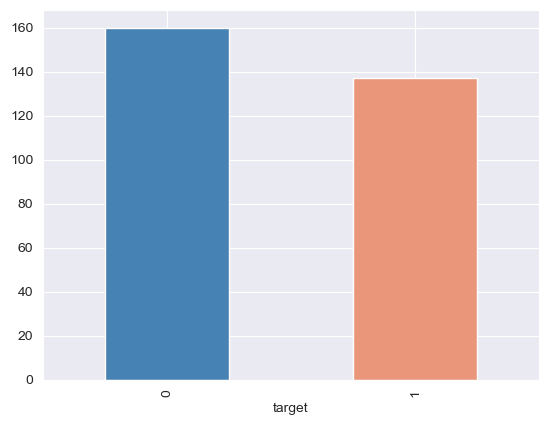

In [31]:
# Let's see the distribution of target variable's class in bar-chart.
df['target'].value_counts().plot(kind="bar", color=['steelblue', 'darksalmon']);

In [23]:
# Let's investigate which features have strong correlation with target.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


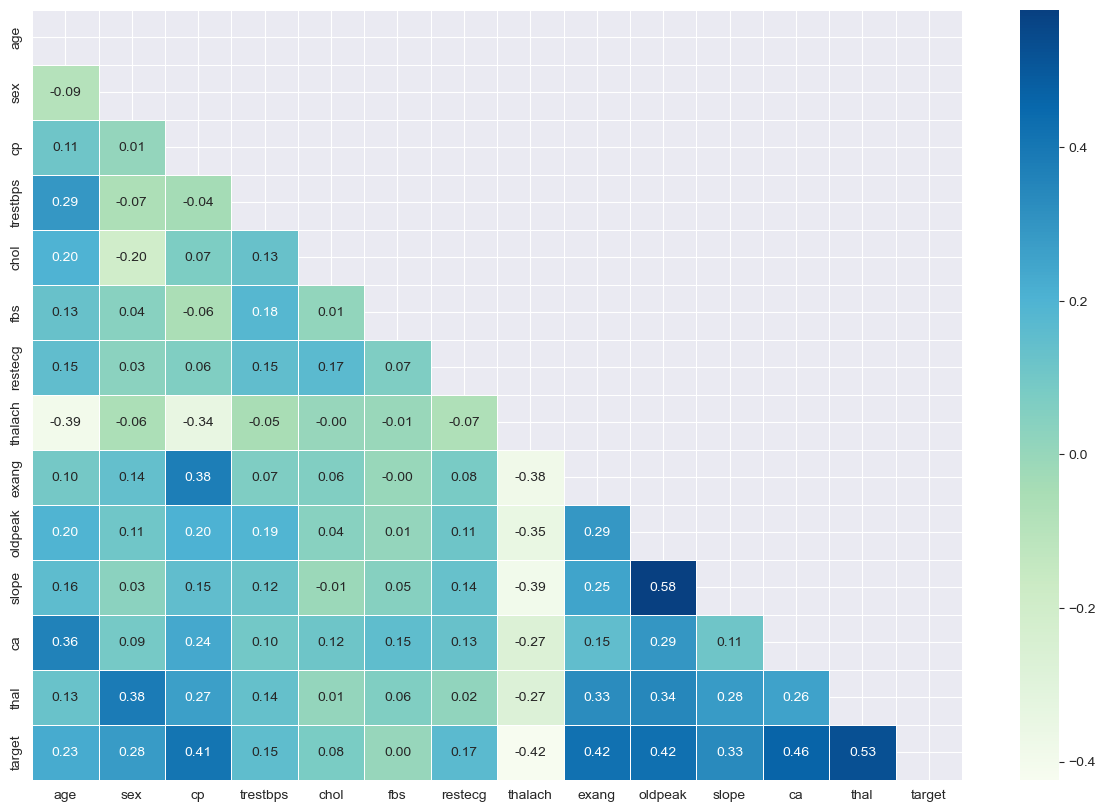

In [60]:
# Let's see the correlation matrix with color intensity spectrum - the darker the blue is, the higher the correlation.
corr_matrix = df.corr(method='pearson')
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="GnBu");

### 5.1 Feature Correlation
By eyeballing the chart (above), we can conclude the following from the Pearson's correlation.

| Level     |   Positive   |    Negative    |
|:----------|:------------:|:--------------:|
| Strong    |  0.70 to 1   |  -0.70 to -1   |
| Moderate  | 0.30 to 0.70 | -0.30 to -0.70 |
| Weak      |  0 to 0.30   |   0 to -0.30   |

If we apply the <u>general rules for classifying correlation</u> (using the table above), we observe:
* Features have <u>only moderate correlation</u> between each other and target variable.
#### Positive correlation - positive linear relationship
* Six features has moderate <u>postive correlation to target</u> variable:
1. thal (0.53)
2. ca (0.46)
3. oldpeak (0.42)
4. exang (0.42)
5. cp (0.41)
6. slope (0.33)
* Six features has moderate <u>positive correlation between variables</u>:
1. oldpeak and slope (0.58)
2. sex and thal (0.38)
3. cp and exang (0.38)
4. age and ca (0.36)
5. oldpeak and thal (0.34)
6. exang and thal (0.33)
#### Negative correlation - negative (inverse) linear relationship
* One feature has moderate <u>negative correlation to target</u> variable:
1. thalach (-0.42)
* Six features has moderate <u> negative correlation between variables</u>:
1. age and thalach (-0.39)
2. thalach and slope (-0.39)
3. thalach and exang (-0.38)
4. thalach and oldpeak (-0.35)
2. cp and thalach (-0.34)
3. thalach and thal (-0.27)
4. thalach and ca (-0.27)

### Further investigation needed
We applied pearson's correlation to identify the correlation. We also need to investigate the following to ensure :
- both variables are quantitative
- variables are normally distributed
- no outliers
* Let's find the top 3 variables and investigate:
1. oldpeak and slope (0.58)
2. thal and target (0.53)
3. ca and target (0.42)
* And, one negative correlation:
1. thalach and target (-0.42)

In [ ]:
# The curve is slightly right skewed. Mean and median also be slightly on the right.
reload(helper)
helper.draw_histogram_density_curve(df,'trestbps')

In [ ]:
df['trestbps'].describe()

In [ ]:
Q3 = df['trestbps'].quantile(0.75)